# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Detecção Liveness

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**.


## 1. Introdução

Uma determinada fintech focada em consumidores finais pessoa física constataou um grande número de fraudes em transações bancárias.

O setor de fraudes apontou que existem clientes que se queixaram de não contratar serviços específicos, como o crédito pessoal, e após isso transferir para outras contas desconhecidas.

Após análises pelas equipes de segurança, os protocolos de utilização da senha foram realizados em conformidade, ou seja, cada cliente autenticou com sua própria senha de maneira regular.

Em função disso, o banco precisa arcar com reembolsos e medidas de contenção para evitar processos judiciais, pois os clientes alegam terem sido invadidos por hackers ou algo parecido.

Uma das formas de solucionar ou minimizar este problema é com a utilização de outras formas de autenticação, sobretudo em operações críticas, como a obtenção de crédito pessoal.

Desta forma podemos implementar uma verificação de identidade com prova de vida (liveness), que utilize uma verificação e identificação facial.

Caso o cliente não seja autenticado, ele será atendido por uma esteira dedicada e as evidências da não identificação serão encaminhadas para a área de IA para validação dos parâmetros e limiares para aperfeiçoamento do modelo.

Será necessário construir:

* Detector de faces
* Identificação de faces (podendo ser um comparador entre um rosto de documento e outra da prova de vida)
* Detecção de vivacidade (liveness) para evitar que um fraudador utilize uma foto estática.


>Formas alternativas de prover a identificação e prova de vivacidade, além destas que foram solicitadas poderão ser submetidas.


<p align="center">
    <img src="https://github.com/michelpf/fiap-ml-visao-computacional-detector-liveness/blob/master/notebook/imagens/liveness.jpg?raw=1">
</p>

Imagem retirada do [Grunge](https://www.grunge.com/192826/company-testing-robocop-facial-recognition-software-with-us-police/).

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Iremos constuir uma forma de validar se uma determinada imagem foi ou não adulterada e se trata de uma produção fraudade.

Existem diversas formas de validar a vivacidade, e neste sentido conto com a criatividade de vocês dado que já dominam encontrar uma face numa imagem, aplicar marcos faciais e até mesmo construir uma rede neural convulacional.

A abordagem mais simples é pela construção de uma rede neural com imagens de fotos de rostos de outras fotos e fotos de rostos sem modificações. Tal classificador deverá classificar se dada imagem possui vivacidade ou não com uma pontuação de probabilidade.

Referências que abordam o tema para servir de inspiração:

1. [PyImageSearch](https://pyimagesearch.com/2019/03/11/liveness-detection-with-opencv/), Liveness detection with OpenCV;
2. [Kickertech](https://kickertech.com/face-liveness-detection-via-opencv-and-tensorflow/), Liveness detection via OpenCV and Tensorflow.
3. [Towards Data Science](https://towardsdatascience.com/real-time-face-liveness-detection-with-python-keras-and-opencv-c35dc70dafd3?gi=24f8e1b740f9), Real-time face liveness detection with Python, Keras and OpenCV.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes       | RM            | Turma |
| :-----------------------   | :------------ | :---: |
| BRUNO DE SOUZA FERRIS      | RM 350952     | 5DTSR |
| GABRIEL DE CARVALHO ROSSI  | RM 352307     | 5DTSR |
| JORGE BONOMI               | RM 351747     | 5DTSR |
| VITOR SILVA LIMA           | RM 352369     | 5DTSR |

## 3. Abordagem e organização da solução do problema (2 pontos)

Como o grupo pretende deteccar a prova de vivacidade de uma determinada imagem? Quais os passos e os building blocks deste processo?

**Resposta**:

## 4 Desenvolvimento da solução (5,5 pontos)

Detalhe o passo-a-passo do algoritmo de deteção de vivacidade.
Se optar pela construção e treinamento de um modelo de redes neurais convulucionais, apresente a arquitetura, prepare os dados de treinamento, realize o treinamento.

### 4.1 Organização de dados para treinamento de modelo de liveness (2 pontos)

In [ ]:
from google.colab import drive
import zipfile

drive.mount('/content/gdrive')

!cp -r "/content/gdrive/MyDrive/base_liveness.zip" "/content"

archive = zipfile.ZipFile('/content/base_liveness.zip')
archive.extractall('/content')

Mounted at /content/gdrive
---------------------Exploring Training Datasets--------------------
There are 2102 images in real directory
There are 2118 images in spoof directory
There are 4220 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 477 images in real directory
There are 474 images in spoof directory
There are 951 total images in testing directory


In [ ]:
train_dir='/content/base_liveness/train'
test_dir = '/content/base_liveness/test'

categories = ['real','falso']

In [ ]:
import os
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

### 4.2 Treinamento de modelo de liveness (1,5 pontos)

In [ ]:
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

train_data = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,
                                   fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)

valid_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

valid_generator = valid_data.flow_from_directory(test_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 4220 images belonging to 2 classes.
Found 951 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 160, 160, 32)      896       
                                                                 
 activation (Activation)     (None, 160, 160, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 80, 80, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 80, 80, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 80, 80, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 40,

<ipython-input-2-18c1c1e2999a>:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
168/168 [==============================] - ETA: 0s - loss: 0.6737 - accuracy: 0.5156
Epoch 1: val_loss improved from inf to 0.65411, saving model to ./model_weights/weights_model_cnn_01-0.517895.h5
168/168 [==============================] - 46s 228ms/step - loss: 0.6737 - accuracy: 0.5156 - val_loss: 0.6541 - val_accuracy: 0.5179
Epoch 2/100
168/168 [==============================] - ETA: 0s - loss: 0.6523 - accuracy: 0.5410
Epoch 2: val_loss improved from 0.65411 to 0.63258, saving model to ./model_weights/weights_model_cnn_02-0.585263.h5
168/168 [==============================] - 40s 239ms/step - loss: 0.6523 - accuracy: 0.5410 - val_loss: 0.6326 - val_accuracy: 0.5853
Epoch 3/100
168/168 [==============================] - ETA: 0s - loss: 0.6328 - accuracy: 0.6184
Epoch 3: val_loss improved from 0.63258 to 0.60680, saving model to ./model_weights/weights_model_cnn_03-0.690526.h5
168/168 [==============================] - 37s 218ms/step - loss: 0.6328 - accuracy: 0.6184 - 

In [ ]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(160,160,3)))

mobilenet.trainable = False

In [ ]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

model = Model(inputs = mobilenet.input,outputs = prediction)

In [ ]:
model.summary()

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

In [ ]:
os.mkdir('/content/model_weights/')

model_checkpoint = ModelCheckpoint('./model_weights/weights_model_mobilenet_{epoch:02d}-{val_accuracy:.6f}.h5',
                                   monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 25,
    epochs = 100,
    callbacks=[model_checkpoint])

In [ ]:
os.mkdir('/content/model_architecture/')
model_json = model.to_json()
with open("/content/model_architecture/architecture_model_mobilenet.json", "w") as json_file:
    json_file.write(model_json)

### 4.3 Métricas de desempenho do modelo (2 pontos)

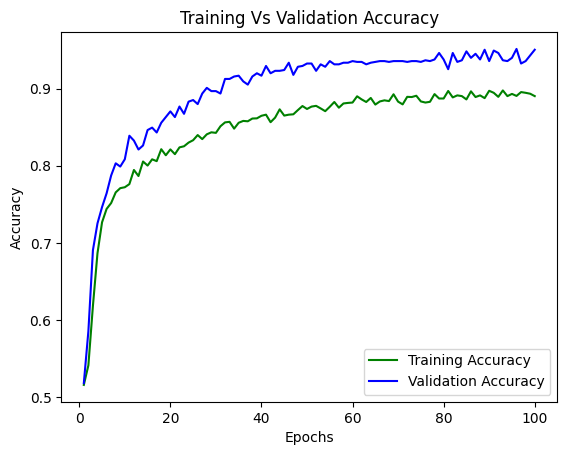

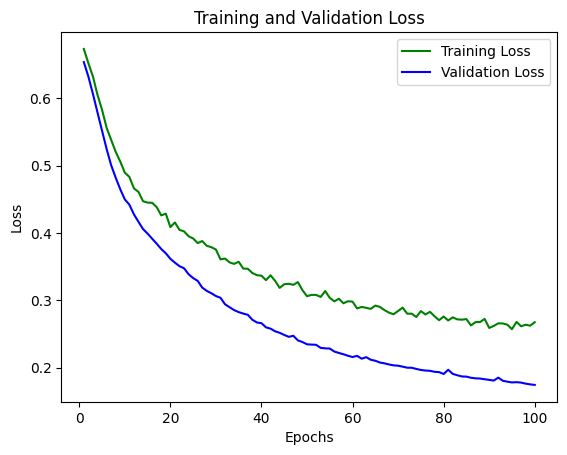

1/1 [==============================] - 0s 18ms/step
{'spoof': 441, 'real': 33}
1/1 [==============================] - 0s 21ms/step
{'real': 463, 'spoof': 14}


In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np
def check_falses(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [ ]:
check_falses(test_dir,categories[0])

In [ ]:
check_falses(test_dir,categories[1])

## 5 Teste Fim-a-Fim

Simule a operação fim-a-fim, com uma imagem de entrada forjada (foto de foto de um rosto) e outra com uma imagem de rosto, exibindo o resultado da classificação e a pontuação de cada classe.

<IPython.core.display.Javascript object>

Saved to ./foto_webcam/foto.jpg


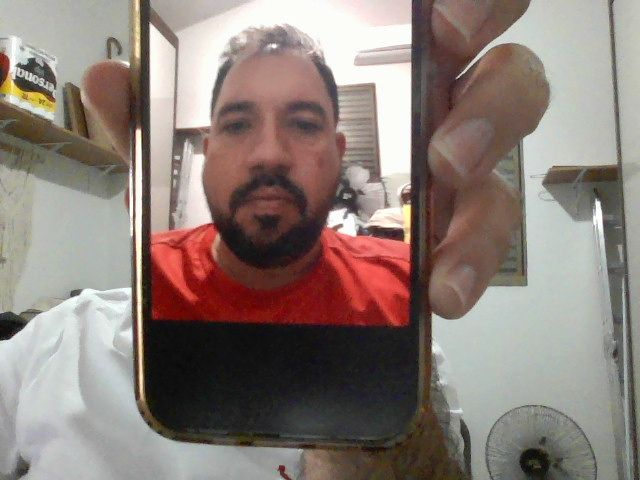

Model loaded from disk
1/1 [==============================] - 2s 2s/step
[[0.01424422]]


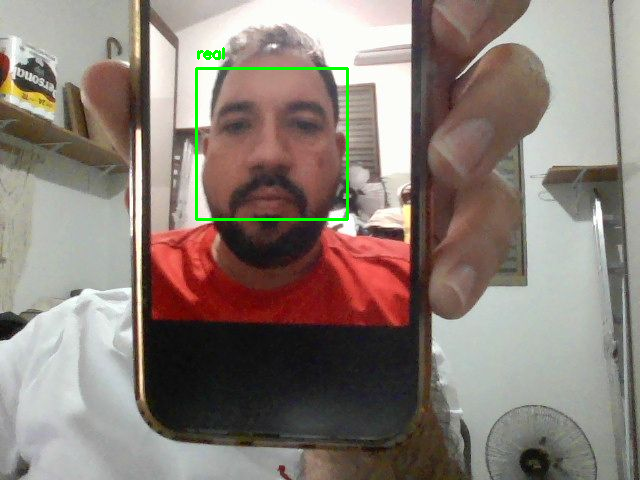

In [ ]:
import os
os.mkdir('/content/foto_webcam/')
os.mkdir('/content/model_architecture/')
os.mkdir('/content/model_weights/')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo("./foto_webcam/foto.jpg")
  print('Saved to {}'.format(filename))


  display(Image(filename))
except Exception as err:

  print(str(err))

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import model_from_json
from keras.preprocessing import image


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


json_file = open('/content/model_architecture/architecture_model_mobilenet.json','r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)


model.load_weights('/content/model_weights/weights_model_mobilenet_97-0.973684.h5')
print("Model loaded from disk")


image_path = "./foto_webcam/foto.jpg"
frame = cv2.imread(image_path)


gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    face = frame[y+100:y+h, x:x+w]

    resized_face = cv2.resize(face, (160, 160))
    img = image.img_to_array(resized_face)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0


    preds = model.predict(img)[0]
    print(preds)
    if preds > 0.5:
        label = 'falso'
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
    else:
        label = 'real'
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [ ]:
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from IPython.display import Image
try:
  filename = take_photo("./foto_webcam/foto.jpg")
  print('Saved to {}'.format(filename))


  display(Image(filename))
except Exception as err:

  print(str(err))

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from keras.models import load_model
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import model_from_json
from keras.preprocessing import image


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


json_file = open('/content/model_architecture/architecture_model_mobilenet.json','r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)


model.load_weights('/content/model_weights/weights_model_mobilenet_97-0.973684.h5')
print("Model loaded from disk")


image_path = "./foto_webcam/foto.jpg"
frame = cv2.imread(image_path)


gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x, y, w, h) in faces:
    face = frame[y+100:y+h, x:x+w]

    resized_face = cv2.resize(face, (160, 160))
    img = image.img_to_array(resized_face)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0


    preds = model.predict(img)[0]
    print(preds)
    if preds > 0.5:
        label = 'falso'
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
    else:
        label = 'real'
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [ ]:
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

>Com a implementação da solução na forma de uma aplicação do [Streamlit](https://www.streamlit.io/) (veja a pata streamlit-app e use o template) vale 1 ponto adicional.

**Pergunta**: Se utilizou o Streamlit, compartilhe a URL do aplicativo publicado:

**Resposta**:

## 6 Conclusões (2,5 pontos)

**Pergunta**: Dado todo o estudo e pesquisa, quais foram as conclusões sobre a solução, o que funcionou, o que não funcionou e quais os detalhes que observariam numa nova versão e melhorias do processo?

**Resposta**: